Primero queremos leer y graficar los datos pertenecientes a la funcion luminosidad de galaxias obtenida por Blanton et al. (2001).

Quiero explorar el espacio de parametros

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
datos=pd.read_csv('/home/camila/Documentos/practico1_astrometria/repositorio/practico4/datos_Blanton2001.csv')
datos

,MAG,PHI,error_inf,error_sup
0,-23.183,0.000003,0.000002,0.000003
1,-23.020,0.000005,0.000003,0.000005
2,-22.870,0.000017,0.000005,0.000009
3,-22.698,0.000035,0.000009,0.000010
4,-22.565,0.000082,0.000024,0.000023
5,-22.411,0.000122,0.000017,0.000020
6,-22.248,0.000241,0.000034,0.000040
7,-22.096,0.000328,0.000038,0.000043
8,-21.942,0.000504,0.000059,0.000084
9,-21.793,0.000933,0.000133,0.000091


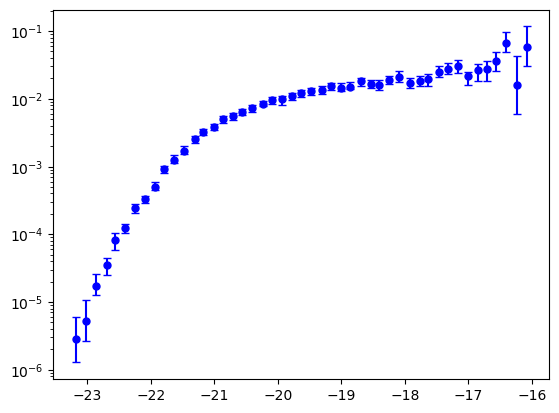

In [3]:
x=datos['MAG']
y=datos['PHI']
error_sup= datos['error_sup']
error_inf= datos['error_inf']
#Los datos de error estan invertidos 

plt.errorbar(x=x,y=y,yerr=[error_inf,error_sup],fmt='ob',ms = 5,  capsize=3)
plt.yscale('log')
plt.show()

Funcion de likehood $L=\prod \frac{1}{\sigma*sqrt(2*pi)}\exp(\frac{(y-y_(model))²}{2*\sigma²})$ 

Funcion  $\log(L)=A-\sum (y-y_(model))²/2*\sigma²$

Funcion probabilidad posterior $log(p(\phi|d,m))=\log(L)+\log(P(\phi,m))-log(p(d|m))$

Vamos a modelar la funcion schechter primero para 

In [4]:
#Defino la funcion schechter
def schechter(M,phi0,a0,M0):
    a=(0.4)*np.log(10)*phi0
    b=10**((-0.4)*(M-M0)*(a0+1))
    c=np.exp(-10**(-0.4*(M-M0)))
    fun=(a*b*c)
    return(fun)

<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_58869/1133145756.py:6: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$\phi(M_r)$')


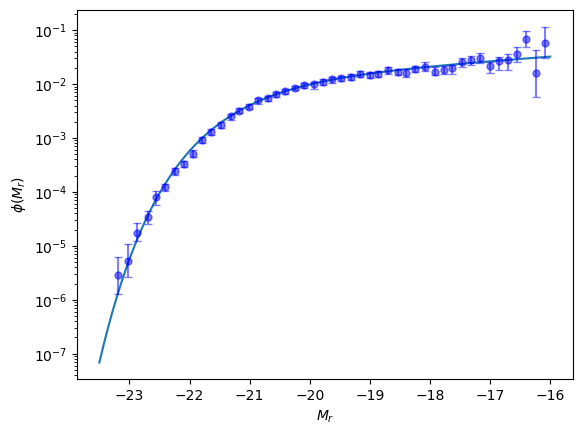

In [5]:
M1=np.linspace(-23.5,-16,100)
plt.plot(M1,schechter(M=M1,phi0=1.46e-2,a0=-1.20,M0=-20.83))
plt.errorbar(x=x,y=y,yerr=[error_inf,error_sup],fmt='ob',ms = 5,  capsize=3,alpha=0.5)
plt.yscale('log')
plt.xlabel('$M_r$')
plt.ylabel('$\phi(M_r)$')
plt.show()

Para explorar cómo cada parámetro afecta al ajuste del modelo de Schechter, puedes realizar lo siguiente:

Ajustar un parámetro a la vez: Podemos fijar todos los parámetros excepto uno y variar ese único parámetro en un rango determinado. Esto te permitirá ver cómo cambia la forma de la función de luminosidad (es decir, cómo afecta el parámetro al modelo).

Visualizar las variaciones: Para cada parámetro, se puede graficar el modelo de Schechter con el parámetro varíando mientras los otros se mantienen constantes, y observar cómo la curva cambia en respuesta.

<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_58869/1933796411.py:11: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$\phi(M_r)$')


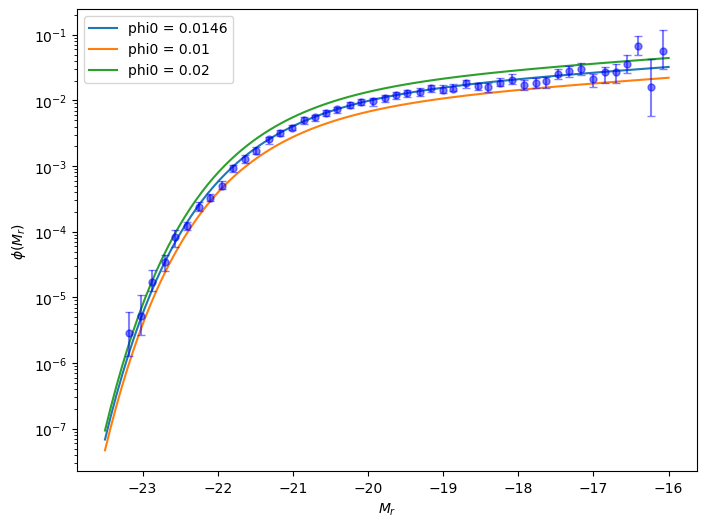

In [6]:
phi0_values = [1.46e-2, 1.0e-2, 2.0e-2]  # Diferentes valores para phi0
M1 = np.linspace(-23.5, -16, 100)

plt.figure(figsize=(8,6))
for phi0_val in phi0_values:
    plt.plot(M1, schechter(M=M1, phi0=phi0_val, a0=-1.20, M0=-20.83), label=f'phi0 = {phi0_val}')

plt.errorbar(x=x, y=y, yerr=[error_inf, error_sup], fmt='ob', ms=5, capsize=3, alpha=0.5)
plt.yscale('log')
plt.xlabel('$M_r$')
plt.ylabel('$\phi(M_r)$')
plt.legend()
plt.show()


<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_58869/2425257006.py:10: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$\phi(M_r)$')


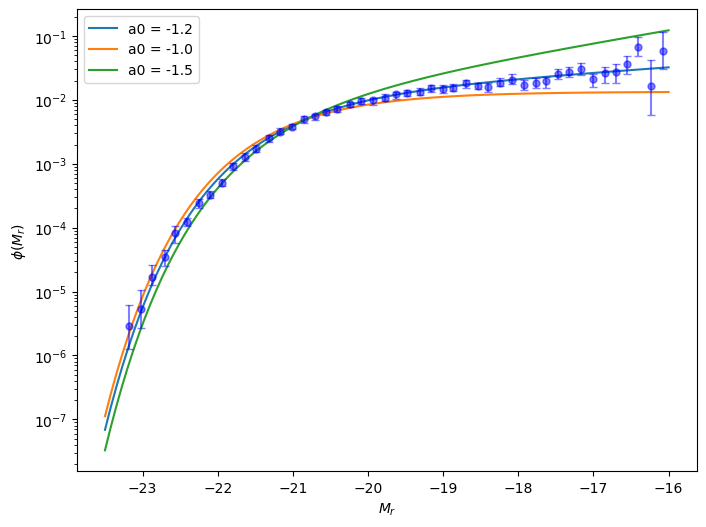

In [7]:
a0_values = [-1.20, -1.0, -1.5]  # Diferentes valores para a0

plt.figure(figsize=(8,6))
for a0_val in a0_values:
    plt.plot(M1, schechter(M=M1, phi0=1.46e-2, a0=a0_val, M0=-20.83), label=f'a0 = {a0_val}')

plt.errorbar(x=x, y=y, yerr=[error_inf, error_sup], fmt='ob', ms=5, capsize=3, alpha=0.5)
plt.yscale('log')
plt.xlabel('$M_r$')
plt.ylabel('$\phi(M_r)$')
plt.legend()
plt.show()


<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_58869/855279916.py:10: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$\phi(M_r)$')


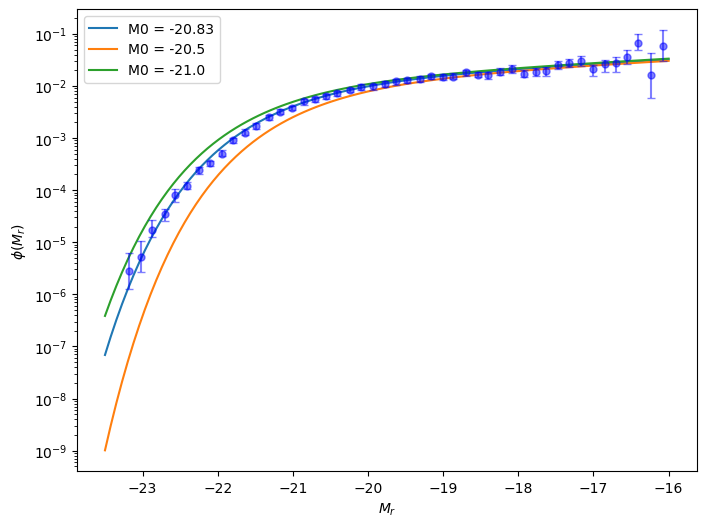

In [8]:
M0_values = [-20.83, -20.5, -21.0]  # Diferentes valores para M0

plt.figure(figsize=(8,6))
for M0_val in M0_values:
    plt.plot(M1, schechter(M=M1, phi0=1.46e-2, a0=-1.20, M0=M0_val), label=f'M0 = {M0_val}')

plt.errorbar(x=x, y=y, yerr=[error_inf, error_sup], fmt='ob', ms=5, capsize=3, alpha=0.5)
plt.yscale('log')
plt.xlabel('$M_r$')
plt.ylabel('$\phi(M_r)$')
plt.legend()
plt.show()


phi0: Cambiar este parámetro afecta la altura de la curva, es decir, cómo de densa es la distribución de galaxias en las magnitudes más brillantes.
a0: Este parámetro controla la pendiente de la función, determinando cómo decrece la densidad de galaxias con magnitudes más brillantes.
M0: Al modificar M0, cambiarás la posición de la "bajada" o la "curvatura" de la curva en el gráfico, ya que esto ajusta la magnitud característica de la distribución.

#Ahora definimos la funcion likehood, prior y probabilidad posterios

In [9]:
sigma= np.abs((datos['error_sup'] + datos['error_inf'])/2) 

In [10]:
def log_likelihood(y, M, phi0, a0, M0, sigma):
    # Calculamos el modelo de Schechter para cada valor de M
    y_model = schechter(M, phi0, a0, M0)
    
    # Calculamos la log-verosimilitud
    logL = -0.5 * np.sum(((y - y_model)**2) / 2*sigma**2)  # La constante A está incluida en la normalización
    return logL

In [11]:
logL = log_likelihood(y=datos['PHI'], M=datos['MAG'], phi0=1.46e-2, a0=-1.20, M0=-20.83, sigma=sigma)
print(f"Log-verosimilitud: {logL}")

Log-verosimilitud: -5.324139185214394e-07


In [12]:
log_likelihood(y=datos['PHI'], M=datos['MAG'], phi0=0.03, a0=-1.9, M0=-22, sigma=sigma) # Prueba con otros valores

-0.008735834163755259

La función de log-verosimilitud que has definido está diseñada para ser minimizada durante el proceso de ajuste de parámetros. Este tipo de formulación de la log-verosimilitud está basado en una distribución normal (o gaussiana) de los residuos. La forma general de la log-verosimilitud para un ajuste de parámetros en modelos de este tipo es siempre negativa, ya que la log-verosimilitud se construye a partir de un error cuadrático, que se minimiza

In [13]:
def prior(phi0, a0, M0,phi0lim, M0lim, alim):
    
    if (phi0lim[0]<=phi0) & (phi0<=phi0lim[1]) & (M0lim[0]<=M0) & (M0<=M0lim[1]) & (alim[0]<=a0) & (a0<=alim[1]):
        return 1.0  # Valor constante para la distribución plana
    else:
        return 0.0  # Cero fuera del rango

In [14]:
# Elegimos rangos razonables basados en la literatura y el comportamiento de los datos
phi0lim = [1e-3, 1e-1]  # Valor de phi0 entre 1e-3 y 1e-1
M0lim = [-22, -19]  # Magnitud característica entre -22 y -19
alim = [-2, -0.5]  # Valor de a0 entre -2 y -0.5

In [15]:
phi0 = 1.46e-2
a0 = -1.20
M0 = -20.83

prior_value = prior(phi0, a0,M0,phi0lim, M0lim, alim)
print(f"Prior: {prior_value}")


Prior: 1.0


In [16]:
#prueba prior
phi0 = 1.46e-2
a0 = -1.20
M0 = -22.5

prior_value = prior(phi0, a0,M0,phi0lim, M0lim, alim)
print(f"Prior: {prior_value}")

Prior: 0.0


Funcion probabilidad posterior $log(p(\phi|d,m))=\log(L)+\log(P(\phi,m))-log(p(d|m))$

In [17]:
#A continuacion utilizamos el teorema de Bayes para definir la probabilidad posterior
def prob_post(y, M, phi0, a0, M0, sigma,phi0lim, M0lim, alim):
    log_pos=log_likelihood(y, M, phi0, a0, M0, sigma)+np.log(prior(phi0, a0, M0,phi0lim, M0lim, alim))
    return(log_pos)

In [18]:
# Llamada a la función para calcular la probabilidad posterior
prob_post(y=datos['PHI'], M=datos['MAG'], phi0=1.46e-2, a0=-1.20, M0=-20.83, sigma=sigma,phi0lim=phi0lim, M0lim=M0lim, alim=alim)



-5.324139185214394e-07

In [19]:
#La llamamos con otros valores 
prob_post(y=datos['PHI'], M=datos['MAG'], phi0=2.9E-2, a0=-1.2, M0=-20, sigma=sigma,phi0lim=phi0lim, M0lim=M0lim, alim=alim)


-1.8187377124717736e-07

In [20]:
prob_post_value_1 = prob_post(y=datos['PHI'], M=datos['MAG'], phi0=1.46e-2, a0=-1.20, M0=-20.83, sigma=sigma,phi0lim=phi0lim, M0lim=M0lim, alim=alim)
prob_post_value_2 = prob_post(y=datos['PHI'], M=datos['MAG'], phi0=2.9E-2, a0=-1.2, M0=-22, sigma=sigma,phi0lim=phi0lim, M0lim=M0lim, alim=alim)

print(f"Probabilidad posterior 1: {prob_post_value_1}")
print(f"Probabilidad posterior 2: {prob_post_value_2}")


Probabilidad posterior 1: -5.324139185214394e-07
Probabilidad posterior 2: -7.008915429434695e-07


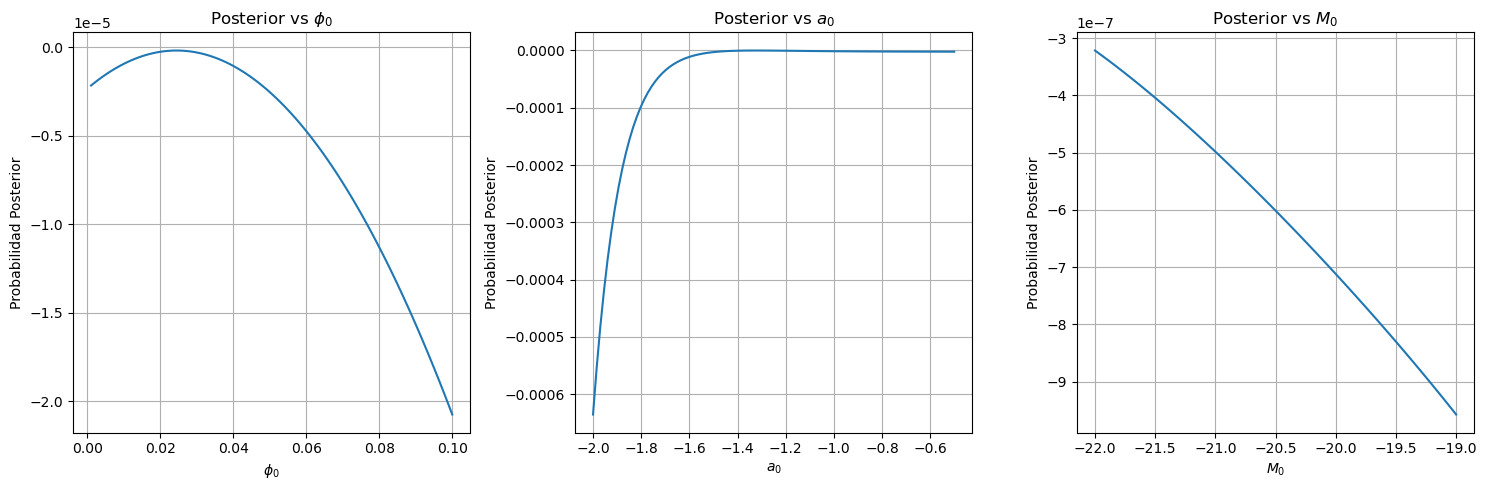

In [21]:


# Valores de ejemplo para phi0, a0 y M0
phi0_values = np.linspace(phi0lim[0], phi0lim[1], 100)
a0_values = np.linspace(alim[0], alim[1], 100)
M0_values = np.linspace(M0lim[0], M0lim[1], 100)

# Inicializar un contenedor para las probabilidades posteriores
posterior_phi0 = np.zeros_like(phi0_values)
posterior_a0 = np.zeros_like(a0_values)
posterior_M0 = np.zeros_like(M0_values)

# Evaluar la probabilidad posterior para cada valor de phi0
for i, phi0 in enumerate(phi0_values):
    posterior_phi0[i] = prob_post(y=datos['PHI'], M=datos['MAG'], phi0=phi0, a0=-1.20, M0=-20.83, sigma=sigma, phi0lim=phi0lim, M0lim=M0lim, alim=alim)

# Evaluar la probabilidad posterior para cada valor de a0
for i, a0 in enumerate(a0_values):
    posterior_a0[i] = prob_post(y=datos['PHI'], M=datos['MAG'], phi0=1.46e-2, a0=a0, M0=-20.83, sigma=sigma, phi0lim=phi0lim, M0lim=M0lim, alim=alim)

# Evaluar la probabilidad posterior para cada valor de M0
for i, M0 in enumerate(M0_values):
    posterior_M0[i] = prob_post(y=datos['PHI'], M=datos['MAG'], phi0=1.46e-2, a0=-1.20, M0=M0, sigma=sigma, phi0lim=phi0lim, M0lim=M0lim, alim=alim)

# Graficar los resultados
plt.figure(figsize=(15, 5))

# Gráfico para phi0
plt.subplot(1, 3, 1)
plt.plot(phi0_values, posterior_phi0)
plt.title(r'Posterior vs $\phi_0$')
plt.xlabel(r'$\phi_0$')
plt.ylabel('Probabilidad Posterior')
plt.grid()

# Gráfico para a0
plt.subplot(1, 3, 2)
plt.plot(a0_values, posterior_a0)
plt.title(r'Posterior vs $a_0$')
plt.xlabel(r'$a_0$')
plt.ylabel('Probabilidad Posterior')
plt.grid()

# Gráfico para M0
plt.subplot(1, 3, 3)
plt.plot(M0_values, posterior_M0)
plt.title(r'Posterior vs $M_0$')
plt.xlabel(r'$M_0$')
plt.ylabel('Probabilidad Posterior')
plt.grid()

plt.tight_layout()
plt.show()


Metropolis-Hasting:
Utilizamos las funciones antes definidas para generar el algoritmo de la cadena, donde busca un punto con una cierta probabilidad, salta a otro punto de manera aleatorea y luego evalurara la funcion likehood en este punto, el cual comparara con el punto anterior, quiero que el valor de mayor a uno, lo que indicaria que el valor es mejor, entonces lo tomo y a partir de ese punto siga recorriendo el espacio de parametros.


In [22]:
#Debo definir la funcion de metropolis hasting
# Elegimos rangos razonables basados en la literatura y el comportamiento de los datos
phi0lim = [0.012, 0.016]  # Valor de phi0 entre 1e-3 y 1e-1
M0lim = [-21.5, -20]  # Magnitud característica entre -22 y -19
alim = [-1.6, -1]  # Valor de a0 entre -2 y -0.5

a0=np.random.uniform(alim[0],alim[1])
phi0=np.random.uniform(phi0lim[0],phi0lim[1])
M0=np.random.uniform(M0lim[0],M0lim[1])
y=datos['PHI']
M=datos['MAG']
#Normalizo el a0,M0,phi0 para darle el mismo paso
#a_norm=(a0-alim[0])/(alim[1]-alim[0])
#M0_norm=(M0-M0lim[0])/(M0lim[1]-M0lim[0])
#phi0_norm=(phi0-phi0lim[0])/(phi0lim[1]-phi0lim[0])
#step=1e-2
#Ahora defino los nuevos parametros iniciales para que la funcion barra el espacio de parametros, que salte al siguiente valor
#a_nuevo=a0+np.random.uniform(-1,1)*step*(alim[1]-alim[0])
#M_nuevo=M0+np.random.uniform(-1,1)*step*(M0lim[1]-M0lim[0])
#phi0_nuevo=phi0+np.random.uniform(-1,1)*step*(phi0lim[1]-phi0lim[0])

def metropolis_hasting(y=y, M=M, phi0=phi0, a0=a0, M0=M0, sigma=sigma,phi0lim=phi0lim, M0lim=M0lim, alim=alim,N_iter=10000):
    p0= -log_likelihood(y, M, phi0, a0,M0, sigma)
    a0_lista=[]
    M0_lista=[]
    phi0_lista=[]
    posteriores=[]
    
    for i in range(N_iter):
        p0= -log_likelihood(y=datos['PHI'], M=datos['MAG'], phi0=1.46e-2, a0=-1.20, M0=-20.83, sigma=sigma)
        step=1e-3
        #print(i)
        #Ahora defino los nuevos parametros iniciales para que la funcion barra el espacio de parametros, que salte al siguiente valor
        a_nuevo=a0+np.random.uniform(-1,1)*step*(alim[1]-alim[0])
        M_nuevo=M0+np.random.uniform(-1,1)*step*(M0lim[1]-M0lim[0])
        phi0_nuevo=phi0+np.random.uniform(-1,1)*step*(phi0lim[1]-phi0lim[0])
        p_nueva=prob_post(y=y, M=M, phi0=phi0_nuevo, a0=a_nuevo, M0=M_nuevo,sigma=sigma,phi0lim=phi0lim, M0lim=M0lim, alim=alim)
        #print(p0,p_nueva,p_nueva-p0)
        if p_nueva-p0>=0:
            a0=a_nuevo
            M0=M_nuevo
            phi0=phi0_nuevo
            p0=p_nueva
        else:
            u=p_nueva-p0
            r=np.log(np.random.rand())
            #print(u,r)
            if r<u:
                a0=a_nuevo
                M0=M_nuevo
                phi0=phi0_nuevo
                p0=p_nueva
            #Si no se cumple esta condicion, no quiero que haga nada, me quedo en donde estoy
        a0_lista.append(a0)
        M0_lista.append(M0)
        phi0_lista.append(phi0)
        posteriores.append(p0)
    return(a0_lista,M0_lista,phi0_lista,posteriores)
#print(a0,M0,phi0)
#metropolis_hasting(y=datos['PHI'], M=datos['MAG'], phi0=phi0, a0=a0, M0=M0, sigma=sigma,phi0lim=phi0lim, M0lim=M0lim, alim=alim)



In [23]:
prob_post(y=y, M=M, phi0=phi0, a0=a0, M0=M0,sigma=sigma,phi0lim=phi0lim, M0lim=M0lim, alim=alim)


-1.1651175759198532e-06

In [24]:
# Llamar a la función metropolis_hasting y obtener los resultados en variables
a0_lista, M0_lista, phi0_lista, posteriores = metropolis_hasting(
    y=datos['PHI'], M=datos['MAG'], phi0=phi0, a0=a0, M0=M0, 
    sigma=sigma, phi0lim=phi0lim, M0lim=M0lim, alim=alim, N_iter=5000
)
# Imprimimos las listas obtenidas
print('lista a0:',a0_lista)  # Imprime la lista de a0
print('lista M0:',M0_lista)  # Imprime la lista de M0
print('lista phi0:',phi0_lista)  # Imprime la lista de phi0
print('lista p0:',posteriores)  # Imprime la lista de p0


/tmp/ipykernel_58869/1046074793.py:3: RuntimeWarning: divide by zero encountered in log
  log_pos=log_likelihood(y, M, phi0, a0, M0, sigma)+np.log(prior(phi0, a0, M0,phi0lim, M0lim, alim))


lista a0: [-1.0368420023854328, -1.0373485785697851, -1.0379137824909428, -1.0384262767995245, -1.0389984289474978, -1.038751654217762, -1.039005504548825, -1.0388633166158663, -1.0389139030776071, -1.0387569932413947, -1.0382940416865167, -1.0381295399074468, -1.0379762560328747, -1.0375839744261914, -1.0378613603853681, -1.0379666483840642, -1.0379411859034553, -1.0380575102378897, -1.0384334385772847, -1.0378952138414437, -1.038325266854462, -1.037949916121682, -1.0381814479048215, -1.0385157509946008, -1.0388665087237547, -1.0388194068531165, -1.0389741817990903, -1.0386199211907152, -1.0387511622814058, -1.0389205761840425, -1.0392118115522724, -1.039720964999084, -1.0396562628876886, -1.0395967104145272, -1.0397564189756248, -1.0402028376003638, -1.039959951894289, -1.0395933300476534, -1.0390390957895819, -1.038559716242626, -1.038254218641324, -1.038287902833154, -1.0383216886328326, -1.038847030005961, -1.0384620874433055, -1.0390555203691905, -1.0391376728997477, -1.039232890

<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_58869/232237204.py:7: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Evolución de $\phi_0$ en función de $a_0$ (Metropolis-Hastings)')
/tmp/ipykernel_58869/232237204.py:11: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Evolución de $M_0$  en función de $\phi_0$ (Metropolis-Hastings)')


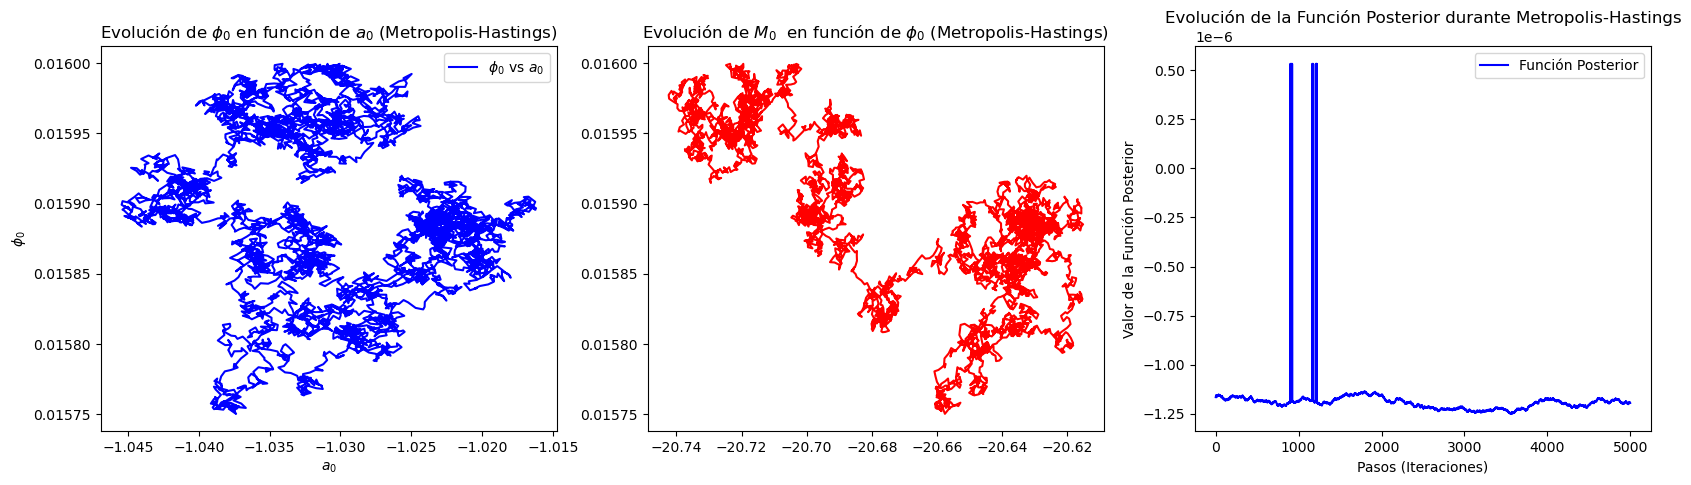

In [25]:

# Graficar phi0 vs a0
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(a0_lista, phi0_lista, label=r'$\phi_0$ vs $a_0$', color='b')
plt.xlabel(r'$a_0$')
plt.ylabel(r'$\phi_0$')
plt.title('Evolución de $\phi_0$ en función de $a_0$ (Metropolis-Hastings)')
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(M0_lista, phi0_lista, label=r'$M_0$ vs $\phi_0$', color='r')
plt.title('Evolución de $M_0$  en función de $\phi_0$ (Metropolis-Hastings)')
# Graficar la función posterior en función de los pasos
plt.subplot(1, 3, 3)
plt.plot(posteriores, label="Función Posterior", color='blue')
plt.xlabel("Pasos (Iteraciones)")
plt.ylabel("Valor de la Función Posterior")
plt.title("Evolución de la Función Posterior durante Metropolis-Hastings")
plt.legend()
plt.show()
